In [2]:
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

### Part A

In [3]:
a = [2,4,3,1,2,4,1,5]
b = [3,4,5,3,6,6,5,5]
W = [5,10,8,7,6,10,6,5]

m = gp.Model("q1_parta")
m.ModelSense = GRB.MINIMIZE
x = m.addVar(name="x",vtype=GRB.CONTINUOUS)
y = m.addVar(name="y",vtype=GRB.CONTINUOUS)
r = m.addVars(range(len(a)), name="r",vtype=GRB.CONTINUOUS)
s = m.addVars(range(len(b)), name="s",vtype=GRB.CONTINUOUS)
m.addConstrs(r[i] >= x - a[i] for i in range(len(a)))
m.addConstrs(r[i] >= a[i] - x for i in range(len(a)))
m.addConstrs(s[i] >= y - b[i] for i in range(len(b)))
m.addConstrs(s[i] >= b[i] - y for i in range(len(b)))
m.setObjective(gp.quicksum(W[i]*(r[i]+s[i]) for i in range(len(W))))

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-08


In [4]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 32 rows, 18 columns and 64 nonzeros
Model fingerprint: 0xcba38835
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 6e+00]
Presolve time: 0.00s
Presolved: 32 rows, 18 columns, 64 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.900000e+01   0.000000e+00      0s
      14    1.1700000e+02   0.000000e+00   0.000000e+00      0s

Solved in 14 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.170000000e+02


In [5]:
print(x.X)
print(y.X)

3.0
5.0


### Part B

In [6]:
a.append(x.X)
b.append(y.X)
W.append(np.mean(W))
m = gp.Model("q1_partb")
m.ModelSense = GRB.MINIMIZE
x = m.addVar(name="x",vtype=GRB.CONTINUOUS)
y = m.addVar(name="y",vtype=GRB.CONTINUOUS)
c = m.addVar(name="c",vtype=GRB.CONTINUOUS)
r = m.addVars(range(len(a)), name="r",vtype=GRB.CONTINUOUS)
s = m.addVars(range(len(b)), name="s",vtype=GRB.CONTINUOUS)
m.addConstrs(r[i] >= x - a[i] for i in range(len(a)))
m.addConstrs(r[i] >= a[i] - x for i in range(len(a)))
m.addConstrs(s[i] >= y - b[i] for i in range(len(b)))
m.addConstrs(s[i] >= b[i] - y for i in range(len(b)))
m.addConstrs(c >= W[i]*(r[i] + s[i]) for i in range(len(a)))
m.setObjective(c)

In [7]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 45 rows, 21 columns and 99 nonzeros
Model fingerprint: 0xb5f01c80
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 6e+00]
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 44 rows, 20 columns, 104 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.700000e+01   0.000000e+00      0s
      14    2.4705882e+01   0.000000e+00   0.000000e+00      0s

Solved in 14 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.470588235e+01


In [8]:
print(x.X)
print(y.X)

2.529411764705882
5.0


## Part C

In [9]:
m = gp.Model("q1_partc")
m.ModelSense = GRB.MINIMIZE
x = m.addVars(range(2), name="x",vtype=GRB.INTEGER)
y = m.addVars(range(2), name="y",vtype=GRB.INTEGER)
z = m.addVars(range(2), range(len(a)), name="z", vtype=GRB.BINARY)
r = m.addVars(range(2), range(len(a)), name="r",vtype=GRB.CONTINUOUS)
s = m.addVars(range(2), range(len(a)), name="s",vtype=GRB.CONTINUOUS)
c = m.addVars(range(2), name="c", vtype=GRB.CONTINUOUS)

m.addConstrs((gp.quicksum(z[i,j] for i in range(2)) == 1) for j in range(len(a)))
m.addConstrs(r[i,j] >= x[i] - a[j] for i in range(2) for j in range(len(a)))
m.addConstrs(r[i,j] >= a[j] - x[i] for i in range(2) for j in range(len(a)))
m.addConstrs(s[i,j] >= y[i] - b[j] for i in range(2) for j in range(len(b)))
m.addConstrs(s[i,j] >= b[j] - y[i] for i in range(2) for j in range(len(b)))
m.addConstrs(c[i] >= z[i,j]*W[j]*(r[i,j] + s[i,j]) for i in range(2) for j in range(len(a)))
m.setObjective(gp.quicksum(c[i] for i in range(2)))

In [10]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 81 rows, 60 columns and 162 nonzeros
Model fingerprint: 0xf00838ba
Model has 18 quadratic constraints
Variable types: 38 continuous, 22 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [5e+00, 1e+01]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Presolve removed 23 rows and 9 columns
Presolve time: 0.00s
Presolved: 148 rows, 159 columns, 368 nonzeros
Presolved model has 72 SOS constraint(s)
Variable types: 110 continuous, 49 integer (45 binary)
Found heuristic solution: objective 62.0000000

Root relaxation: objective 0.000000e+00, 23 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent 

In [11]:
print("First fire station location:  ({},{})".format(x[0].X, y[0].X))
print("Second fire station location: ({},{})".format(x[1].X, y[1].X))

First fire station location:  (3.0,5.0)
Second fire station location: (1.0,3.0)


## Question 2

In [12]:
locations = list(map(chr, range(65, 77)))
facilities = ["D"+str(i) for i in range(1,6)]
flow = pd.DataFrame(np.array([[0,100,50,0,0],
                 [75,0,50,50,25],
                 [100,25,0,0,0],
                 [0,0,50,0,50],
                 [50,0,50,25,0]]),index=facilities,columns=facilities)
distance = pd.DataFrame(np.array([[0,1,2,3,1,2,3,4,2,3,4,5],
                      [1,0,1,2,2,1,2,3,3,2,3,4],
                      [2,1,0,1,3,2,1,2,4,3,2,3],
                      [3,2,1,0,4,3,2,1,5,4,3,2],
                      [1,2,3,4,0,1,2,3,1,2,3,4],
                      [2,1,2,3,1,0,1,2,2,1,2,3],
                      [3,2,1,2,2,1,0,1,3,2,1,2],
                      [4,3,2,1,3,2,1,0,4,3,2,1],
                      [2,3,4,5,1,2,3,4,0,1,2,3],
                      [3,2,3,4,2,1,2,3,1,0,1,2],
                      [4,3,2,3,3,2,1,2,2,1,0,1],
                      [5,4,3,2,4,3,2,1,3,2,1,0]]),index=locations,columns=locations)
assignments = [(i,j,r,s) for i in facilities for j in facilities 
                for r in locations for s in locations if i != j and r != s]

In [13]:
locations

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

In [54]:
m = gp.Model("q2")
m.ModelSense = GRB.MINIMIZE

x=m.addVars(facilities, locations, name="x", vtype=GRB.BINARY)
c1 = m.addConstrs(gp.quicksum(x[i,r] for i in facilities) <= 1 for r in locations)
c2 = m.addConstrs(gp.quicksum(x[i,r] for r in locations) == 1 for i in facilities)
c3 = m.addConstr(gp.quicksum(distance.at[i,j] * x["D1",i] * x["D4",j] for i in locations for j in locations) >= 2)
#for loc1 in locations:
#    for loc2 in locations:
#        if distance.at[loc1, loc2] < 2:
#            m.addConstr(x["D1", loc1] + x["D4", loc2] <= 1)
c4 = m.addConstrs(x[i,r] == 0 for i in ["D1", "D2", "D5"] for r in ["A", "D", "L", "I"])
c5 = m.addConstrs(x["D3",r] == 0 for r in locations if (r in ["A", "D", "L", "I"]) == False) 
m.setObjective(gp.quicksum((flow.at[i,j]*distance.at[r,s] + flow.at[j,i]*distance.at[s,r])*x[i,r]*x[j,s] 
                           for i in facilities for j in facilities for r in locations for s in locations 
                           if i != j and r != s))

In [55]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 37 rows, 60 columns and 140 nonzeros
Model fingerprint: 0xba0d4197
Model has 1188 quadratic objective terms
Model has 1 quadratic constraint
Variable types: 0 continuous, 60 integer (60 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 5e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e+02, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [2e+00, 2e+00]
Presolve removed 20 rows and 20 columns
Presolve time: 0.01s
Presolved: 678 rows, 612 columns, 1972 nonzeros
Variable types: 0 continuous, 612 integer (612 binary)
Found heuristic solution: objective 3300.0000000
Found heuristic solution: objective 2450.0000000
Found heuristic solution: objective 2400.0000000

Root relaxation: objective 0.000000e+00, 113 iterations, 0.00 seconds (0.0

In [56]:
for key in x.keys():
    if x[key].X > 0:
        print(key)

('D1', 'E')
('D2', 'F')
('D3', 'A')
('D4', 'C')
('D5', 'B')


In [57]:
flow

,D1,D2,D3,D4,D5
D1,0,100,50,0,0
D2,75,0,50,50,25
D3,100,25,0,0,0
D4,0,0,50,0,50
D5,50,0,50,25,0


You can ignore the rest, these are for the plot of mirrored grid location.

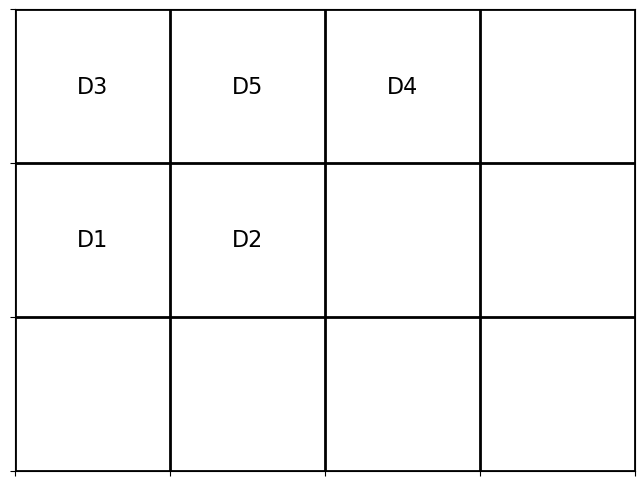

In [58]:
ind=0
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
chr_len = 0.07
# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 4, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
for i in range(len(locations)):
    for key in x.keys():
        if x[key].X > 0 and key[0] in ["D1", "D2", "D3", "D4", "D5"] and key[1] == locations[i]:
            x_loc = 0.5+(i%4)
            y_loc = 2.5-(i//4)
            ax.text(x_loc, y_loc, key[0],
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontdict={'size':16})
plt.show()
ind+=1
fig.savefig("image" +str(ind)+".png", dpi=100)

In [62]:
flow

,D1,D2,D3,D4,D5
D1,0,100,50,0,0
D2,75,0,50,50,25
D3,100,25,0,0,0
D4,0,0,50,0,50
D5,50,0,50,25,0


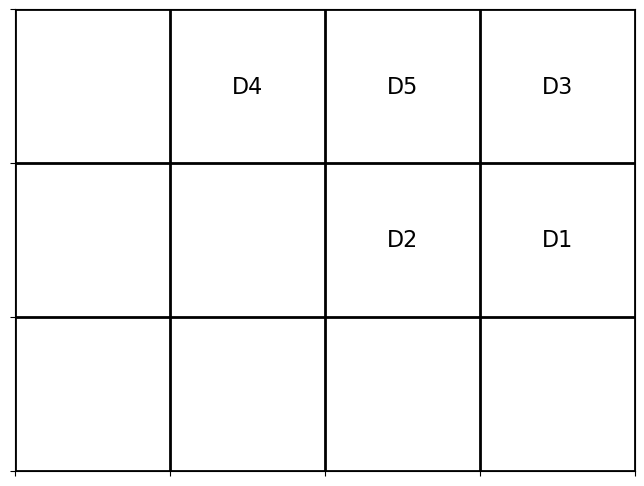

In [59]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
chr_len = 0.07
# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 4, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
for i in range(len(locations)):
    for key in x.keys():
        if x[key].X > 0 and key[0] in ["D1", "D2", "D3", "D4", "D5"] and key[1] == locations[i]:
            x_loc = 3.5-(i%4)
            y_loc = 2.5-(i//4)
            ax.text(x_loc, y_loc, key[0],
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontdict={'size':16})
plt.show()
ind+=1
fig.savefig("image" +str(ind)+".png", dpi=100)

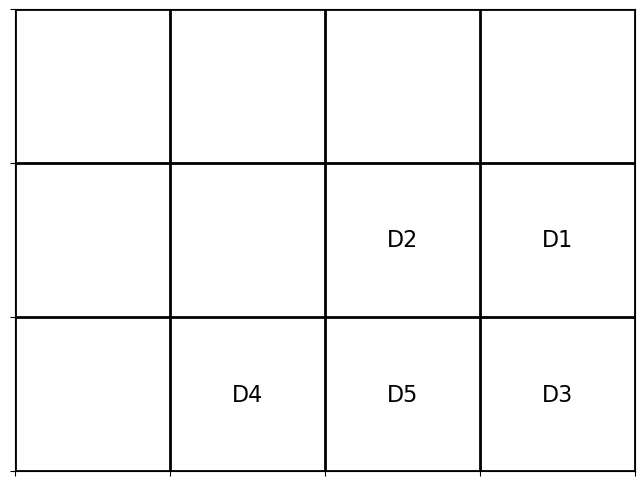

In [60]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
chr_len = 0.07
# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 4, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
for i in range(len(locations)):
    for key in x.keys():
        if x[key].X > 0 and key[0] in ["D1", "D2", "D3", "D4", "D5"] and key[1] == locations[i]:
            x_loc = 3.5-(i%4)
            y_loc = 0.5+(i//4)
            ax.text(x_loc, y_loc, key[0],
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontdict={'size':16})
plt.show()
ind+=1
fig.savefig("image" +str(ind)+".png", dpi=100)

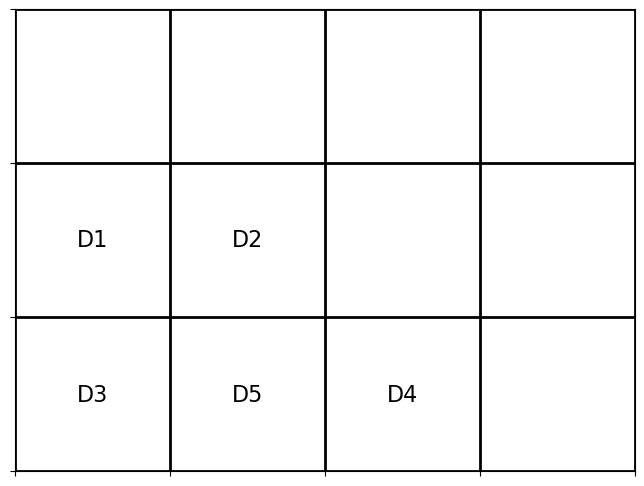

In [61]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
chr_len = 0.07
# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 4, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
for i in range(len(locations)):
    for key in x.keys():
        if x[key].X > 0 and key[0] in ["D1", "D2", "D3", "D4", "D5"] and key[1] == locations[i]:
            x_loc = 0.5+(i%4)
            y_loc = 0.5+(i//4)
            ax.text(x_loc, y_loc, key[0],
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontdict={'size':16})
plt.show()
ind+=1
fig.savefig("image" +str(ind)+".png", dpi=100)

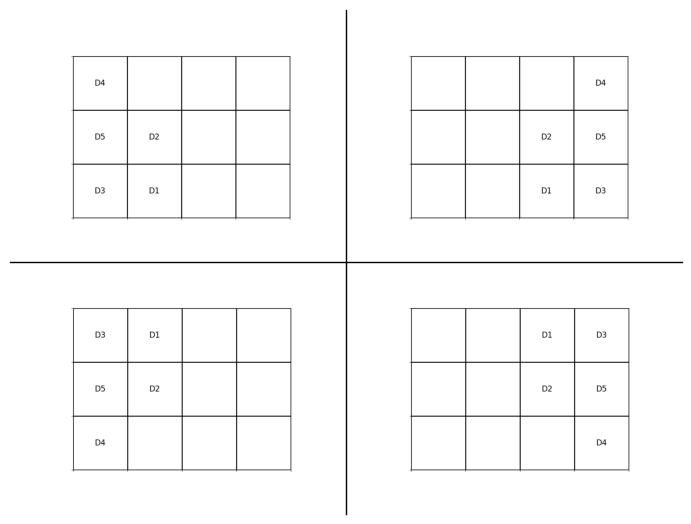

In [51]:
from PIL import Image, ImageDraw
f, axarr = plt.subplots(2,2, figsize=(8,6), dpi=100)
axarr[0,0].imshow(Image.open("image1.png"))
axarr[0,1].imshow(Image.open("image2.png"))
axarr[1,0].imshow(Image.open("image4.png"))
axarr[1,1].imshow(Image.open("image3.png"))
axarr[0,0].get_xaxis().set_visible(False)
axarr[0,0].set_frame_on(False)
axarr[0,0].get_yaxis().set_visible(False)
axarr[0,1].get_xaxis().set_visible(False)
axarr[0,1].set_frame_on(False)
axarr[0,1].get_yaxis().set_visible(False)
axarr[1,0].get_xaxis().set_visible(False)
axarr[1,0].set_frame_on(False)
axarr[1,0].get_yaxis().set_visible(False)
axarr[1,1].get_xaxis().set_visible(False)
axarr[1,1].set_frame_on(False)
axarr[1,1].get_yaxis().set_visible(False)
axarr[0,0].plot([-0.1,2.3], [-0.1, -0.1], color='black', lw=1, transform=axarr[0,0].transAxes, clip_on=False)
axarr[0,0].plot([1.1,1.1], [-1.3, 1.1], color='black', lw=1, transform=axarr[0,0].transAxes, clip_on=False)
f.savefig("output.png", dpi=200)